<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.874968,88.294053,30.296520,-0.000088,155.465453,155.466309,-0.000857
1,0.0,1.0,42.951344,73.852220,52.119510,0.000276,178.923351,178.923147,0.000204
2,0.0,2.0,42.434753,88.885449,76.915869,-0.000139,218.235932,218.235709,0.000224
3,0.0,3.0,61.204704,76.777843,66.063405,-0.000363,214.045589,214.045905,-0.000316
4,0.0,4.0,36.583443,84.657463,23.469720,0.000113,154.710740,154.711642,-0.000902
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.332208,64.381893,44.104300,-0.000071,192.818330,192.817899,0.000431
29996,999.0,26.0,71.715643,31.855089,55.078680,-0.000026,168.649386,168.648294,0.001093
29997,999.0,27.0,33.145018,77.694688,95.759336,0.000419,216.599462,216.599612,-0.000150
29998,999.0,28.0,38.619457,20.560943,36.583140,-0.005521,105.758019,105.762245,-0.004226


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.874968,88.294053,30.296520,-0.000088,155.465453,155.466309,-0.000857
1,0.0,1.0,42.951344,73.852220,52.119510,0.000276,178.923351,178.923147,0.000204
2,0.0,2.0,42.434753,88.885449,76.915869,-0.000139,218.235932,218.235709,0.000224
3,0.0,3.0,61.204704,76.777843,66.063405,-0.000363,214.045589,214.045905,-0.000316
4,0.0,4.0,36.583443,84.657463,23.469720,0.000113,154.710740,154.711642,-0.000902
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.332208,64.381893,44.104300,-0.000071,192.818330,192.817899,0.000431
29996,999.0,26.0,71.715643,31.855089,55.078680,-0.000026,168.649386,168.648294,0.001093
29997,999.0,27.0,33.145018,77.694688,95.759336,0.000419,216.599462,216.599612,-0.000150
29998,999.0,28.0,38.619457,20.560943,36.583140,-0.005521,105.758019,105.762245,-0.004226


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.874968  88.294053  30.296520 -0.000088  155.465453   
      1.0    42.951344  73.852220  52.119510  0.000276  178.923351   
      2.0    42.434753  88.885449  76.915869 -0.000139  218.235932   
      3.0    61.204704  76.777843  66.063405 -0.000363  214.045589   
      4.0    36.583443  84.657463  23.469720  0.000113  154.710740   
...                ...        ...        ...       ...         ...   
999.0 25.0   74.332208  64.381893  44.104300 -0.000071  192.818330   
      26.0   71.715643  31.855089  55.078680 -0.000026  168.649386   
      27.0   33.145018  77.694688  95.759336  0.000419  216.599462   
      28.0   38.619457  20.560943  36.583140 -0.005521  105.758019   
      29.0   70.058620  23.450153  65.106955 -0.002608  168.613119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    155.466309 -0.000857  
      1.0    178.923147  0.000204  
      2.0    218.235709  0.000224  
      3.0    214.045905 -0.000316  
      4.0    154.711642 -0.000902  
...                 ...       ...  
999.0 25.0   192.817899  0.000431  
      26.0   168.648294  0.001093  
      27.0   216.599612 -0.000150  
      28.0   105.762245 -0.004226  
      29.0   168.614521 -0.001402  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.874968  88.294053  30.296520 -0.000088  155.465453   
      1.0    42.951344  73.852220  52.119510  0.000276  178.923351   
      2.0    42.434753  88.885449  76.915869 -0.000139  218.235932   
      3.0    61.204704  76.777843  66.063405 -0.000363  214.045589   
      4.0    36.583443  84.657463  23.469720  0.000113  154.710740   
...                ...        ...        ...       ...         ...   
999.0 25.0   74.332208  64.381893  44.104300 -0.000071  192.818330   
      26.0   71.715643  31.855089  55.078680 -0.000026  168.649386   
      27.0   33.145018  77.694688  95.759336  0.000419  216.599462   
      28.0   38.619457  20.560943  36.583140 -0.005521  105.758019   
      29.0   70.058620  23.450153  65.106955 -0.002608  168.613119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    155.466309 -0.000857  
      1.0    178.923147  0.000204  
      2.0    218.235709  0.000224  
      3.0    214.045905 -0.000316  
      4.0    154.711642 -0.000902  
...                 ...       ...  
999.0 25.0   192.817899  0.000431  
      26.0   168.648294  0.001093  
      27.0   216.599612 -0.000150  
      28.0   105.762245 -0.004226  
      29.0   168.614521 -0.001402  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.874968,88.294053,30.296520,-0.000088,155.465453,155.466309,-0.000857
1,0.0,1.0,42.951344,73.852220,52.119510,0.000276,178.923351,178.923147,0.000204
2,0.0,2.0,42.434753,88.885449,76.915869,-0.000139,218.235932,218.235709,0.000224
3,0.0,3.0,61.204704,76.777843,66.063405,-0.000363,214.045589,214.045905,-0.000316
4,0.0,4.0,36.583443,84.657463,23.469720,0.000113,154.710740,154.711642,-0.000902
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.332208,64.381893,44.104300,-0.000071,192.818330,192.817899,0.000431
29996,999.0,26.0,71.715643,31.855089,55.078680,-0.000026,168.649386,168.648294,0.001093
29997,999.0,27.0,33.145018,77.694688,95.759336,0.000419,216.599462,216.599612,-0.000150
29998,999.0,28.0,38.619457,20.560943,36.583140,-0.005521,105.758019,105.762245,-0.004226


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.874968  88.294053  30.296520 -0.000088  155.465453   
      1.0    42.951344  73.852220  52.119510  0.000276  178.923351   
      2.0    42.434753  88.885449  76.915869 -0.000139  218.235932   
      3.0    61.204704  76.777843  66.063405 -0.000363  214.045589   
      4.0    36.583443  84.657463  23.469720  0.000113  154.710740   
...                ...        ...        ...       ...         ...   
999.0 25.0   74.332208  64.381893  44.104300 -0.000071  192.818330   
      26.0   71.715643  31.855089  55.078680 -0.000026  168.649386   
      27.0   33.145018  77.694688  95.759336  0.000419  216.599462   
      28.0   38.619457  20.560943  36.583140 -0.005521  105.758019   
      29.0   70.058620  23.450153  65.106955 -0.002608  168.613119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    155.466309 -0.000857  
      1.0    178.923147  0.000204  
      2.0    218.235709  0.000224  
      3.0    214.045905 -0.000316  
      4.0    154.711642 -0.000902  
...                 ...       ...  
999.0 25.0   192.817899  0.000431  
      26.0   168.648294  0.001093  
      27.0   216.599612 -0.000150  
      28.0   105.762245 -0.004226  
      29.0   168.614521 -0.001402  

[30000 rows x 7 columns]

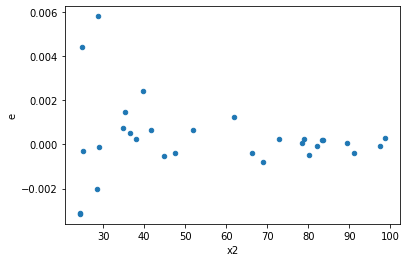

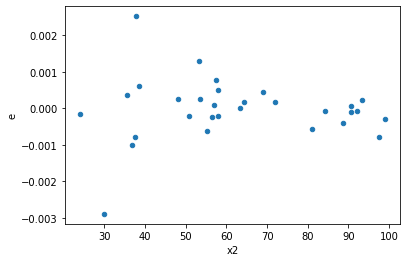

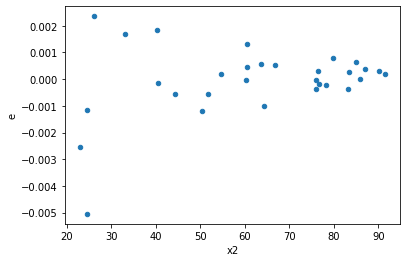

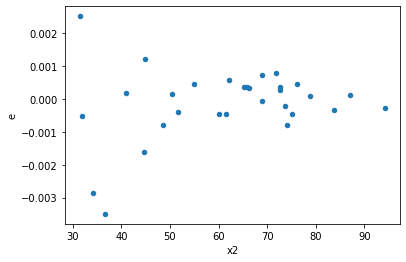

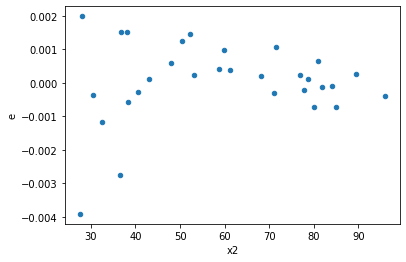

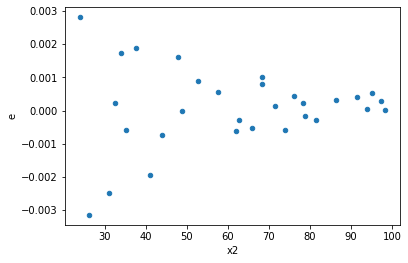

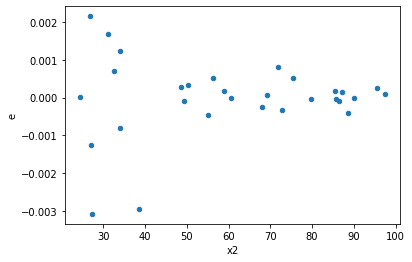

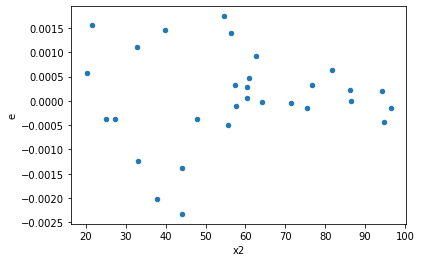

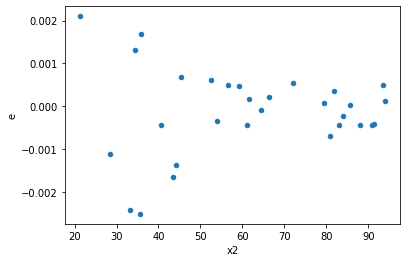

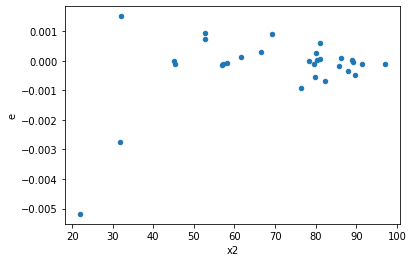

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,9.0,9.0,7.381849691735582e-06,1.0944030137571826e-05,8.202055213039536e-07,1.2160033486190919e-06,1.4825593306003395,0.5668344996277273,0.7165827501861364,0.2834172498138636,Reject005=1 : Homoscedasticity
26.0,9.0,9.0,2.151172987288138e-06,8.185638966459494e-06,2.390192208097931e-07,9.095154407177215e-07,3.8051979151981943,0.05934894052505024,0.9703255297374749,0.02967447026252512,Reject005=1 : Homoscedasticity
29.0,9.0,9.0,8.853337894823488e-06,1.6025095043770153e-05,9.837042105359432e-07,1.7805661159744614e-06,1.8100625136130817,0.3899755133633547,0.8050122433183227,0.19498775668167734,Reject005=1 : Homoscedasticity
34.0,9.0,9.0,8.171877527770897e-06,2.1916251782636764e-05,9.079863919745441e-07,2.4351390869596404e-06,2.6819114344479194,0.15781703297565608,0.921091483512172,0.07890851648782804,Reject005=1 : Homoscedasticity
44.0,9.0,9.0,7.992022304939372e-06,1.2398031085215515e-05,8.880024783265968e-07,1.3775590094683906e-06,1.5513008613042865,0.523368539282941,0.7383157303585295,0.2616842696414705,Reject005=1 : Homoscedasticity
60.0,9.0,9.0,1.1132989266123217e-05,2.8105205309753014e-05,1.236998807347024e-06,3.122800589972557e-06,2.524497656283104,0.1839421996111681,0.908028900194416,0.09197109980558404,Reject005=1 : Homoscedasticity
79.0,9.0,9.0,2.076226957028269e-05,2.6952383591494305e-05,2.3069188411425213e-06,2.9947092879438118e-06,1.298142455007501,0.7038132300094682,0.6480933849952659,0.3519066150047341,Reject005=1 : Homoscedasticity
84.0,9.0,9.0,3.1372834672449063e-06,9.127530531816687e-06,3.485870519161007e-07,1.014170059090743e-06,2.9093738666312747,0.1274342398900823,0.9362828800549589,0.06371711994504115,Reject005=1 : Homoscedasticity
112.0,9.0,9.0,4.709132266086973e-06,1.4268714179623394e-05,5.232369184541081e-07,1.5854126866248214e-06,3.0300092189765357,0.11416721934857499,0.9429163903257125,0.057083609674287494,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,5.988945248705816e-05,5.561560386408371e-07,6.654383609673129e-06,6.179511540453746e-08,0.009286377075512919,8.867693381565881e-08,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,7.534763445852434e-06,3.943628360983813e-06,8.371959384280482e-07,4.3818092899820144e-07,0.5233911308993532,0.34888071625624895,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,6.2623358942297485e-06,3.4824391018278525e-06,6.95815099358861e-07,3.869376779808725e-07,0.5560926722306044,0.39515068645300283,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,6.243571002678006e-06,5.387540972540015e-07,6.937301114086673e-07,5.986156636155572e-08,0.08628941626881761,0.001175635301468994,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,1.5141422619711595e-05,2.5623502672082845e-06,1.6823802910790662e-06,2.8470558524536494e-07,0.16922784150232578,0.014263651528271495,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,2.292715651667584e-05,5.076838071533675e-06,2.5474618351862044e-06,5.640931190592972e-07,0.22143339353229813,0.034888680872772374,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,3.198944845824982e-05,4.5953228846487276e-06,3.5543831620277576e-06,5.105914316276364e-07,0.1436512070736759,0.008010235414923258,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,5.172575639412603e-05,1.8968469695474846e-06,5.747306266014003e-06,2.1076077439416495e-07,0.036671227291378776,3.5200163746553306e-05,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,1.0277859420107886e-05,5.885778587230604e-07,1.1419843800119873e-06,6.539753985811781e-08,0.057266580001235516,0.00022647189003694246,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    662
Reject005=1 : Homoscedasticity      338
Name: Result_test, dtype: int64